In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam

In [2]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
import string
import pandas as pd
import numpy as np
import os
import random
import copy
import re
import copy

In [3]:
terms=open("C:/Users/beera/Downloads/terms.txt").read().split('\n')
sw=open("C:/Users/beera/Downloads/stopwords.txt").read().split('\n')

In [4]:
inpu_train_len=[]
def preprocess(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-z!"$%)?\'])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9])\. ([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 inpu_train_len.append(len(data))
 stemmer=PorterStemmer()
 i=0
 for i in range(len(data)):
  data[i]=data[i].translate(str.maketrans('','', string.punctuation))
  data[i]=nltk.word_tokenize(data[i])
  rdata=[]
  for q in data[i]:
   if q not in sw:
    rdata.append(q)
  data[i]=copy.deepcopy(rdata)
  j=0
  rdata=[]
  while(j<len(data[i])):
   data[i][j]=stemmer.stem(data[i][j])
   if data[i][j] in terms:
    rdata.append(terms.index(data[i][j])+1)
    j+=1
   else:
    j+=1
  data[i]=copy.deepcopy(rdata)

 rectangle=np.zeros((246,500),dtype='int32')
 for i in range(len(data)):
     rectangle[i:i+1,0:len(data[i])]=data[i]


 return rectangle

In [5]:
got=[]
def preprocesssum(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-zA-Z])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9!"$%)?\'])\.([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 got.append(len(data))
 stemmer=PorterStemmer()
 i=0
 for i in range(len(data)):
  data[i]=data[i].translate(str.maketrans('','', string.punctuation))
  data[i]=nltk.word_tokenize(data[i])
  rdata=[]
  for q in data[i]:
   if q not in sw:
    rdata.append(q)
  data[i]=copy.deepcopy(rdata)
  j=0
  rdata=[]
  while(j<len(data[i])):
   data[i][j]=stemmer.stem(data[i][j])
   if data[i][j] in terms:
    rdata.append(terms.index(data[i][j])+1)
    j+=1
   else:
    j+=1
  data[i]=copy.deepcopy(rdata)
 
 rectangle=np.zeros((246,500),dtype='int32')
 for i in range(len(data)):
     rectangle[i:i+1,0:len(data[i])]=data[i]


 return rectangle

In [6]:
def pretest(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-z!"$%)?\'])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9])\. ([A-Z])', r'\1 . \2',data)
 data=data.lower()
 data=nltk.sent_tokenize(data)
 return data

In [7]:
def pretestsum(d):
 data=d.strip()
 data=data.split('\n')
 data=' '.join(data)
 data=re.sub(r'([a-zA-Z])\.([A-Z])', r'\1. \2',data)
 data=re.sub(r'([0-9!"$%)?\'])\.([A-Z])', r'\1 . \2',data)
 data=data.lower()
 return data

In [8]:
train_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_train.csv"))
test_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_test.csv"))
val_path=os.path.abspath(os.path.join("C:/Users/beera/Downloads/generated-data/bbc_combined_val.csv"))

In [9]:
train_df=pd.read_csv(train_path,header=0,usecols=[1,2],nrows=1777)
print('Number of train sentences: ',len(train_df))
input_train=train_df['article'].values
target_train=train_df['summary'].values

print(input_train[10])
print(target_train[10])

test_df=pd.read_csv(test_path,header=0,usecols=[1,2],nrows=221)
print('Number of train sentences: ',len(test_df))
input_test=test_df['article'].values
target_test=test_df['summary'].values
target=copy.deepcopy(target_test)
inpu=copy.deepcopy(input_test)

val_df=pd.read_csv(val_path,header=0,usecols=[1,2],nrows=227)
print('Number of train sentences: ',len(val_df))
input_val=val_df['article'].values
target_val=val_df['summary'].values

Number of train sentences:  1776
Ask Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes. The firm's revenue nearly tripled in the fourth quarter of 2004, exceeding $86m (£46m). Ask Jeeves, once among the best-known names on the web, is now a relatively modest player. Its $17m profit for the quarter was dwarfed by the $204m announced by rival Google earlier in the week. During the same quarter, Yahoo earned $187m, again tipping a resurgence in online advertising. The trend has taken hold relatively quickly. Late last year, marketing company Doubleclick, one of the leading providers of online advertising, warned that some or all of its business would have to be put up for sale. But on Thursday, it announced that a sharp turnaround had brought about an unexpected increase in profits. Neither Ask Jeeves nor Doubleclick thrilled investors with their profit news, however. In both cases, their shares fell by some 

In [10]:
target_train_len=[]
for i in range(0,len(input_train)):
 rectangle=np.zeros((246),dtype='int32')
 input_train[i]=preprocess(input_train[i]).tolist()
 target_train[i]=preprocesssum(target_train[i]).tolist()
 if(i==17):
  print(input_train[i],'\n',target_train[i])
 for j in range(0,len(input_train[i])):
  if(input_train[i][j].count(0)<500 and input_train[i][j] in target_train[i]):
   rectangle[j]=1
 rect=copy.deepcopy(rectangle).tolist()
 target_train_len.append(rect.count(1))
 input_train[i]=tf.convert_to_tensor(input_train[i],dtype='int32')
 target_train[i]=tf.convert_to_tensor(rectangle,dtype='int32')

[[636, 1204, 163, 1205, 360, 1206, 842, 8174, 387, 668, 265, 205, 244, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
print(inpu_train_len,'\n',target_train_len,'\n',got)
print(target_train[6])

[20, 15, 12, 19, 12, 9, 14, 15, 12, 10, 11, 14, 14, 22, 28, 11, 11, 9, 12, 29, 15, 15, 11, 14, 23, 14, 14, 9, 20, 17, 16, 15, 10, 13, 11, 14, 19, 10, 11, 11, 15, 13, 9, 18, 13, 15, 11, 12, 28, 15, 16, 21, 9, 12, 15, 14, 21, 11, 14, 8, 10, 15, 15, 14, 16, 15, 15, 17, 25, 8, 10, 15, 11, 12, 10, 13, 22, 12, 12, 11, 13, 9, 24, 11, 10, 9, 18, 11, 20, 18, 16, 18, 14, 10, 12, 7, 23, 10, 17, 16, 16, 12, 20, 16, 10, 13, 12, 9, 9, 14, 25, 15, 17, 19, 10, 11, 21, 12, 21, 15, 23, 18, 10, 8, 12, 19, 21, 16, 9, 20, 23, 11, 14, 13, 20, 26, 11, 15, 15, 22, 13, 15, 12, 8, 11, 47, 11, 11, 28, 16, 13, 17, 21, 16, 13, 13, 12, 7, 23, 17, 18, 15, 17, 19, 17, 12, 12, 11, 9, 9, 11, 18, 18, 14, 11, 10, 16, 13, 10, 14, 22, 12, 39, 15, 12, 12, 15, 19, 20, 19, 20, 16, 14, 10, 21, 15, 13, 13, 18, 30, 15, 16, 14, 23, 13, 16, 14, 14, 26, 18, 12, 13, 19, 12, 23, 17, 23, 10, 14, 13, 17, 24, 13, 25, 11, 14, 9, 11, 24, 12, 14, 13, 7, 8, 9, 19, 11, 16, 9, 12, 35, 32, 42, 24, 48, 22, 13, 15, 27, 13, 17, 26, 14, 16, 9, 11,

In [12]:
for i in range(0,len(input_test)):
 inpu[i]=pretest(inpu[i])
 target[i]=pretestsum(target[i])
 rectangle=np.zeros((246),dtype='int32')
 input_test[i]=preprocess(input_test[i]).tolist()
 target_test[i]=preprocesssum(target_test[i]).tolist()
 for j in range(0,len(input_test[i])):
  if(input_test[i][j].count(0)<500 and input_test[i][j] in target_test[i]):
   rectangle[j]=1
 input_test[i]=tf.convert_to_tensor(input_test[i],dtype='int32')
 target_test[i]=tf.convert_to_tensor(rectangle,dtype='int32')

In [13]:
print(input_test[i])
print(rectangle)
print(target[i])

tf.Tensor(
[[ 843 1196  847 ...    0    0    0]
 [4601 3465 1097 ...    0    0    0]
 [9492 3421 3465 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]], shape=(246, 500), dtype=int32)
[1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
but the set-top box which receives hdtv broadcasts has to plug into a display - tv set - that can show the images at the much higher resolution that hd demands, if hdtv is to be "real" . thousands of flat panel screens - lcds (li

In [14]:
for i in range(0,len(input_val)):
 rectangle=np.zeros((246),dtype='int32')
 input_val[i]=preprocess(input_val[i]).tolist()
 target_val[i]=preprocesssum(target_val[i]).tolist()
 for j in range(0,len(input_val[i])):
  if(input_val[i][j].count(0)<500 and input_val[i][j] in target_val[i]):
   rectangle[j]=1
 input_val[i]=tf.convert_to_tensor(input_val[i],dtype='int32')
 target_val[i]=tf.convert_to_tensor(rectangle,dtype='int32')

In [15]:
print(input_val[i])
print(rectangle)

tf.Tensor(
[[  60 1532 1369 ...    0    0    0]
 [ 847 4484 1119 ...    0    0    0]
 [1380 1369  461 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]], shape=(246, 500), dtype=int32)
[1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
#Input layer
input_layer=Input(shape=(246,500))

#BiLSTM layer
bi_lstm=Bidirectional(LSTM(128,return_sequences=True))(input_layer)

#Dense layer
dense_layer=Dense(1,activation='sigmoid')(bi_lstm)

#Reshape layer
reshape_layer=Reshape((246,))(dense_layer)

#Create the model
model=tf.keras.Model(inputs=input_layer,outputs=reshape_layer)

optimizer=Adam(learning_rate=0.005)

#Compiling the model 
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

#Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 246, 500)]        0         
                                                                 
 bidirectional (Bidirection  (None, 246, 256)          644096    
 al)                                                             
                                                                 
 dense (Dense)               (None, 246, 1)            257       
                                                                 
 reshape (Reshape)           (None, 246)               0         
                                                                 
Total params: 644353 (2.46 MB)
Trainable params: 644353 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
epochs=50
batch_size=9

In [18]:
input_train=np.array([np.array(val) for val in input_train])
input_test=np.array([np.array(val) for val in input_test])
input_val=np.array([np.array(val) for val in input_val])
target_train=np.array([np.array(val) for val in target_train])
target_test=np.array([np.array(val) for val in target_test])
target_val=np.array([np.array(val) for val in target_val])

In [19]:
print(input_train.shape)
print(target_train.shape)
print(input_test.shape)
print(target_test.shape)
print(input_val.shape)
print(target_val.shape)

(1776, 246, 500)
(1776, 246)
(221, 246, 500)
(221, 246)
(227, 246, 500)
(227, 246)


In [20]:
history=model.fit(input_train,target_train,epochs=epochs,batch_size=batch_size,validation_data=(input_val,target_val))

Epoch 1/50


198/198 [==============================] - 30s 119ms/step - loss: 0.0590 - accuracy: 0.3530 - val_loss: 0.0550 - val_accuracy: 0.4626
Epoch 2/50
198/198 [==============================] - 23s 114ms/step - loss: 0.0492 - accuracy: 0.4414 - val_loss: 0.0553 - val_accuracy: 0.5330
Epoch 3/50
198/198 [==============================] - 23s 118ms/step - loss: 0.0492 - accuracy: 0.5405 - val_loss: 0.0552 - val_accuracy: 0.6123
Epoch 4/50
198/198 [==============================] - 27s 135ms/step - loss: 0.0490 - accuracy: 0.5901 - val_loss: 0.0548 - val_accuracy: 0.6256
Epoch 5/50
198/198 [==============================] - 23s 116ms/step - loss: 0.0489 - accuracy: 0.6143 - val_loss: 0.0552 - val_accuracy: 0.6256
Epoch 6/50
198/198 [==============================] - 23s 114ms/step - loss: 0.0489 - accuracy: 0.6639 - val_loss: 0.0547 - val_accuracy: 0.6784
Epoch 7/50
198/198 [==============================] - 24s 120ms/step - loss: 0.0487 - accuracy: 0.6751 - val_loss: 0.0549 - val_

In [21]:
evaluation=model.evaluate(input_test,target_test)
print("Test Loss: ",evaluation[0])
print("Test Accuracy: ", evaluation[1])

7/7 [==============================] - 1s 90ms/step - loss: 0.0464 - accuracy: 0.7376
Test Loss:  0.04635932296514511
Test Accuracy:  0.7375565767288208


In [27]:
predictions=model.predict(input_test)
pred=[]
print(predictions[0])
t=0
mp=0.40
predict=[i.tolist() for i in predictions]
for z in predict:
 rx=0
 result1=[]
 result2=[]
 for k in z:
  if k>mp:
   result1.append(k)
  else:
   result2.append(k)
 if len(result1)<5:
  result1+=sorted(result2)[-(5-len(result1)):] 
 stres=""
 rx=float(sum(result1))/float(len(result1))
 print(rx,end=" ")
 print(mp,end=" ")
 mp=mp*0.999+0.001*rx
 print(mp)
 for k in result1:
  stres+=inpu[t][z.index(k)]+" "
 pred.append(stres)
 t+=1
print(pred[0])
print(target[0])

7/7 [==============================] - 1s 99ms/step
[6.89381182e-01 4.81092006e-01 5.22358000e-01 2.74502456e-01
 3.23299021e-01 3.81575644e-01 3.06663036e-01 4.19077456e-01
 3.77465367e-01 4.01546478e-01 4.42129493e-01 3.82622480e-01
 4.49182838e-01 2.66851038e-01 2.66720533e-01 3.67603928e-01
 3.57205182e-01 3.69017243e-01 3.62785161e-01 4.00468558e-01
 3.85156721e-01 3.96246284e-01 3.71632785e-01 3.46737683e-01
 3.37116420e-01 3.56924683e-01 3.25026035e-01 4.77652162e-01
 4.20843393e-01 3.28262359e-01 2.97989845e-01 6.18374429e-07
 6.07482491e-08 4.05217442e-08 1.80203497e-08 2.23000871e-08
 3.05470707e-08 3.17615054e-08 2.98781764e-08 2.74139893e-08
 2.52522536e-08 2.34686972e-08 2.17998828e-08 2.02937755e-08
 1.91057357e-08 1.82083024e-08 1.75348838e-08 1.70303718e-08
 1.66520540e-08 1.63657710e-08 1.61410796e-08 1.59169833e-08
 1.55265738e-08 1.49128052e-08 1.40950229e-08 1.24042945e-08
 1.07284519e-08 1.00041380e-08 1.09507816e-08 1.32811895e-08
 1.33743816e-08 1.28058142e-08 1.

In [28]:
import evaluate
rouge=evaluate.load('rouge')
results=rouge.compute(predictions=pred, references=target)
print(results)

{'rouge1': 0.6353483536679028, 'rouge2': 0.5290270637112238, 'rougeL': 0.4306368128373226, 'rougeLsum': 0.4301092994334408}


In [30]:
f=open('target.txt','w'); p=open('predictnonMAML.txt','w')
f.close(); p.close()
f=open('target.txt','a'); p=open('predictnonMAML.txt','a')
for i in range(len(pred)):
 f.write(target[i]+'\n\n')
 p.write(pred[i]+'\n\n')

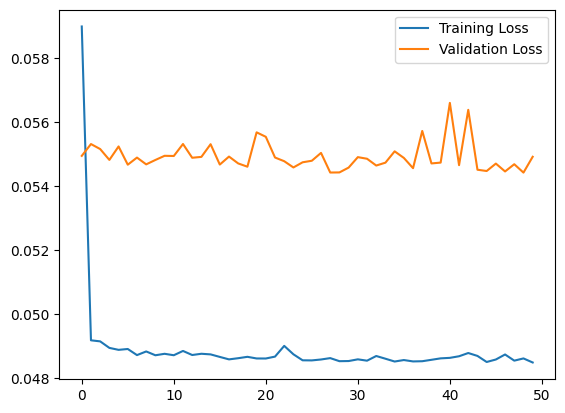

In [24]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

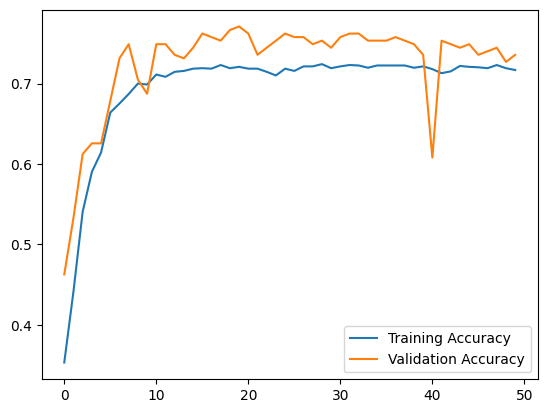

In [25]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()